# Heart Disease Prediction 

In this example we'll work with the famous "UCI Heart Disease" dataset. This dataset contains a set of attributes related to patient potentially affected by a cardiovascular disease (CVD). CVD is one of the biggest causes of mortality but it's estimated that up to 90% of CVD may be preventable, an early diagnosis could be essential in most cases and AI can achieve this goal.

## Binary Classification
Classification is one of the most common unsupervised learning tasks. In a lot of ML applications we need a model that is able to distinguish between two classes, therefore a binary classifier.
With the help of the most common ML libraries (like sklearn) it's really easy to train a binary classifier, however evaluating the performance it's not so easy. We will explore model training/evaluating and concepts like Confusion Matrix, Precision, Recall etc ...

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
# Get the data
data = pd.read_csv('heart.csv')

In [4]:
# Let's check the data we have
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute meaning:

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3.  cp: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


303 records, all numerical and no null values.

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The mean age is the 54 years, adults are more likely than younger people to suffer from cardiovascular disease.

In [7]:
# Let's check the target value
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

The dataset is balanced. However, this is the most boring dataset ever XD no missing values, no labels to encode, balanced dataset ... Let's change some columns just for fun 

In [8]:
# Add some labels
data.sex = data.sex.replace([1, 0], ["Male", "Female"])
data.cp = data.cp.replace([0, 1, 2, 3], ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"])
data.fbs = data.fbs.replace([0, 1], ["False", "True"])
data.restecg = data.restecg.replace([0, 1, 2], ["normal", "having ST-T wave abnormality", "showing probable or definite left ventricular hypertrophy by Estes' criteria"])
data.exang = data.exang.replace([0, 1], ["No", "Yes"])
data.slope = data.slope.replace([0, 1, 2], ["upsloping", "flat", "downsloping"])

# Add missing values
data.chol = data.chol.sample(frac=0.9)
data.trestbps = data.trestbps.sample(frac=0.85)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145.0,233.0,True,normal,150,No,2.3,upsloping,0,1,1
1,37,Male,non-anginal pain,130.0,250.0,False,having ST-T wave abnormality,187,No,3.5,upsloping,0,2,1
2,41,Female,atypical angina,130.0,204.0,False,normal,172,No,1.4,downsloping,0,2,1
3,56,Male,atypical angina,120.0,236.0,False,having ST-T wave abnormality,178,No,0.8,downsloping,0,2,1
4,57,Female,typical angina,NaN,354.0,False,having ST-T wave abnormality,163,Yes,0.6,downsloping,0,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  258 non-null    float64
 4   chol      273 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 33.3+ KB


A little bit dirty dataset <3

In [10]:
# test and train split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=5)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

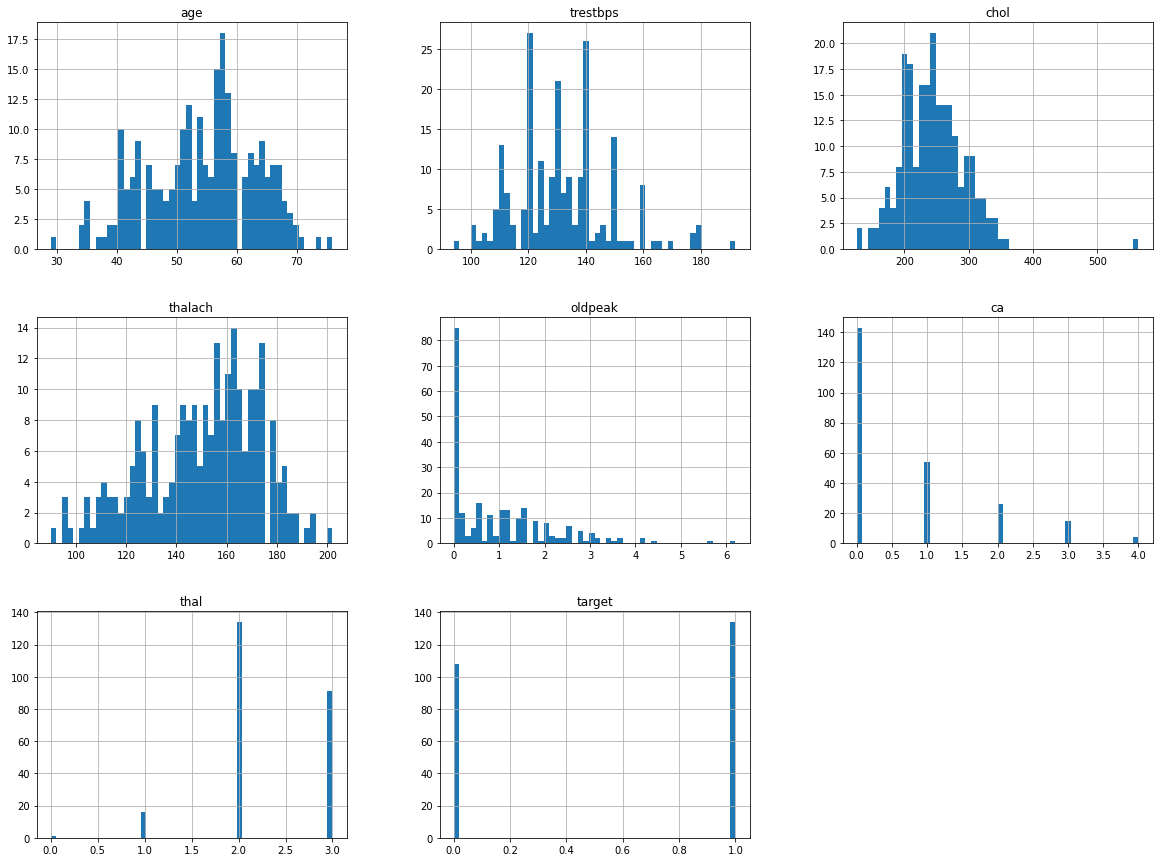

In [11]:
# Let's plot the numerical histogram
train_set.hist(bins=50, figsize=(20, 15))

The feature have different scale, it's a good idea to perform standard scaling

In [12]:
# Create a pipeline to encode categorical variable using one hot encoding, insert missing values using the median strategy and scale the value 
cat_attr = ["sex", "cp", "fbs", "restecg", "exang", "slope"]
num_attr = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca", "thal"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", OneHotEncoder(), cat_attr)
])

In [13]:
x_train = train_set.drop("target", axis=1)
y_train = train_set.target

In [14]:
x_train_pr = full_pipeline.fit_transform(x_train)

Let's train a simple binary classifier, a Stochastic Gradient Descent classifier (SGD)

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=40)

Usually a good way to evaluate a model is to use cross-validation

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, x_train_pr, y_train, cv=3, scoring="accuracy")
scores.mean()

0.7689814814814815

It's not a great value. I think it's a better idea to evaluate our model using other tools like the confusion matrix

In [17]:
# It's like cross-validation but it returns the predictions
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(sgd_clf, x_train_pr, y_train, cv=3)

In [18]:
# Now we can plot the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, preds)

array([[ 78,  30],
       [ 26, 108]])

Let's see precison and recall score

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, preds)

0.782608695652174

In [20]:
recall_score(y_train, preds)

0.8059701492537313

In [22]:
# The f1 score combines precision and recall
from sklearn.metrics import f1_score

f1_score(y_train, preds)

0.7941176470588236

In [23]:
# Another measure is the roc aud score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, preds)

0.7640961857379768

I think that it's a better idea to try more powerfull models like a RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_preds = cross_val_predict(forest_clf, x_train_pr, y_train, cv=3)

In [25]:
confusion_matrix(y_train, forest_preds)

array([[ 81,  27],
       [ 24, 110]])

In [26]:
precision_score(y_train, forest_preds)

0.8029197080291971

In [27]:
recall_score(y_train, forest_preds)

0.8208955223880597

In [28]:
f1_score(y_train, forest_preds)

0.8118081180811809

Slightly better thant the SGD classifier. Let's train the random forest classifier on the full dataset and evaluate on the test set

In [29]:
forest_clf.fit(x_train_pr, y_train)

RandomForestClassifier(random_state=42)

In [30]:
x_test = test_set.drop("target", axis=1)
y_test = test_set.target

In [31]:
x_test_pr = full_pipeline.transform(x_test)

final_preds = forest_clf.predict(x_test_pr)

In [32]:
precision_score(y_test, final_preds)

0.8529411764705882

In [33]:
recall_score(y_test, final_preds)

0.9354838709677419

In [34]:
f1_score(y_test, final_preds)

0.8923076923076922

This was a simple example on how to evaluate a classifier, however the result is good! Cross-validation is a good method for model evaluation, but since we split our dataset in 3 folds the model had few data for achieve good performances. With the full dataset we reach a good result!